In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [9]:
df = pd.read_csv('/Users/martinbogaert/Desktop/will-the-knicks-win-tonight/training_data_2023.csv')
df = df[(df['G_home'] > 1) & (df['G_away'] > 1)]

In [10]:
features = ['NRtg', 'NRtg_5', 'NRtg_10', 'NRtg_25', 'W/L', 'W/L_5', 'W/L_10', 'W/L_25', 'Streak', 'Rest', 'rVORP', 'rSKILL']

In [15]:
N = 1000
acc = np.zeros((N, 2))
for i in range(N) :

    print(i, end = '\r')

    X_train, X_test, y_train, y_test = train_test_split(np.array(df[features]), np.array(df['W_home']), test_size = 0.1)

    rfc = RandomForestClassifier()
   # lr  = LogisticRegression()
    xgb_model = xgb.XGBClassifier(objective = 'binary:logistic')

    for j, model in enumerate([rfc, xgb_model]) :
    
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc[i, j] = sum(y_pred - y_test == 0) / y_test.shape[0]

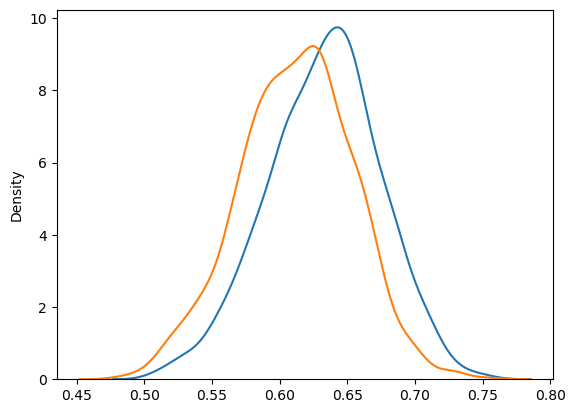

In [33]:
#plt.hist(acc, 15, color = 'w', edgecolor = 'k')
# plt.hist(acc[:, 0], 25, color = 'r', edgecolor = 'k')
# plt.hist(acc[:, 1], 25, color = 'b', edgecolor = 'k')
import seaborn as sns
sns.kdeplot(acc[:,0])
sns.kdeplot(acc[:,1])
plt.show()

In [68]:
N = 500
acc_pca = np.zeros((N, len(features)))
for i in range(N) :

    print(i, end = '\r')

    X_train, X_test, y_train, y_test = train_test_split(np.array(df[features]), np.array(df['W_home']), test_size = 0.1)

    pca = PCA()
    X_pca = pca.fit_transform(X_train)

    for r in range(len(features)) :

        model = RandomForestClassifier()

        model.fit(X_pca[:, :(r+1)], y_train)

        y_pred = model.predict(pca.transform(X_test)[:, :(r+1)])
        acc_pca[i, r] = sum((y_pred - y_test) == 0) / y_test.shape[0]

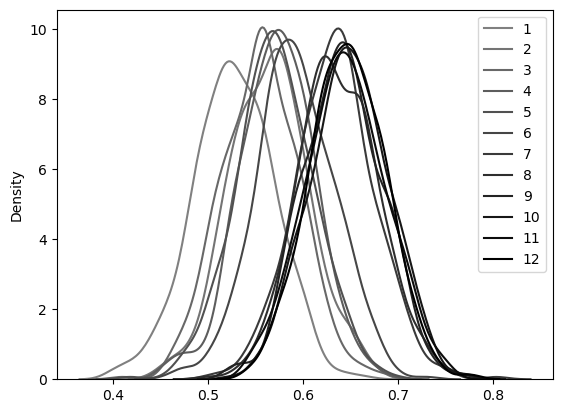

In [73]:
plt.figure()
for r in range(len(features)) :

    sns.kdeplot(acc_pca[:, r], color = (0.5-0.5*r/11, 0.5-0.5*r/11, 0.5-0.5*r/11), label = r+1)

plt.legend()
plt.show()

In [76]:
N = 500
acc_pca2 = np.zeros((N, len(features)))
for i in range(N) :

    print(i, end = '\r')

    X_train, X_test, y_train, y_test = train_test_split(np.array(df[features]), np.array(df['W_home']), test_size = 0.1)

    pca = PCA()
    scaler = StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)
    X_pca = pca.fit_transform(X_train_norm)

    for r in range(len(features)) :

        model = RandomForestClassifier()

        model.fit(X_pca[:, :(r+1)], y_train)

        y_pred = model.predict(pca.transform(X_test_norm)[:, :(r+1)])
        acc_pca2[i, r] = sum((y_pred - y_test) == 0) / y_test.shape[0]

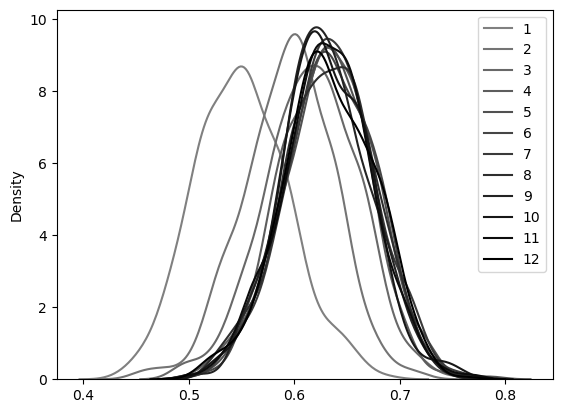

In [77]:
plt.figure()
for r in range(len(features)) :

    sns.kdeplot(acc_pca2[:, r], color = (0.5-0.5*r/11, 0.5-0.5*r/11, 0.5-0.5*r/11), label = r+1)

plt.legend()
plt.show()

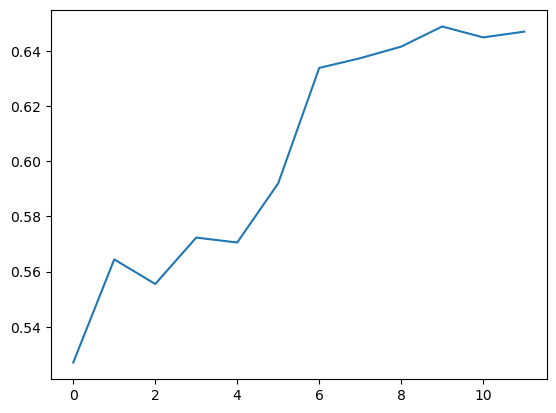

In [79]:
plt.plot(acc_pca.mean(axis = 0))

In [6]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective = 'binary:logistic')

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

sum(y_pred - y_test == 0) / y_test.shape[0]

0.5628415300546448

In [12]:
model = LinearRegression()
model.fit(train[features], train['PTS_diff'])

NameError: name 'train' is not defined

# Use this notebook to test different neural networks

In [22]:
model.coef_

array([  0.51851382,  -0.11563174,   0.29456118,  -0.59138554,
       -14.1241794 ,  -0.18759944,  -8.42247713,  18.6513404 ,
         0.27445452,   0.10702431,  -5.03801261,   9.43605354])

## By the end of it, output a .h5 model that is most accurate

In [35]:
sum((model.predict(test[features]) - test['PTS_diff']) ** 2)

43054.92059457086

In [36]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components = 3)

In [50]:
X = pca.fit_transform(train[features])

In [51]:
model2 = LinearRegression()
model2.fit(X, train['PTS_diff'])

LinearRegression()

In [54]:
sum((model2.predict(pca.transform(test[features])) - test['PTS_diff']) ** 2)

53432.0919810375

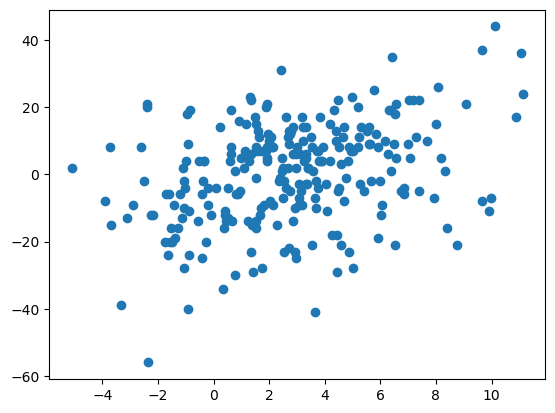

In [56]:
plt.scatter(model2.predict(pca.transform(test[features])), test['PTS_diff'])

In [6]:
df = pd.concat([pd.read_csv(f'/Users/martinbogaert/Desktop/will-the-knicks-win-tonight/training_data_{yr}.csv') for yr in np.arange(2021, 2024)]).reset_index(drop = True)
df = df[df['NRtg'].notna()]
features = ['NRtg', 'NRtg_5', 'NRtg_10', 'NRtg_25', 'W/L', 'W/L_5', 'W/L_10', 'W/L_25', 'Streak', 'Rest', 'rVORP', 'rSKILL']

X_train, X_test, y_train, y_test = train_test_split(np.array(df[features]), np.array(df['W_home']), test_size = 0.1)

In [7]:
model = LogisticRegression()

In [9]:
model.fit(X_train, y_train)

/Users/martinbogaert/anaconda3/envs/nbaenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [37]:
y_pred = model.predict_proba(X_test)[:, 1]

In [47]:
sum((np.ones_like(y_test) - y_test) == 0) / y_test.shape[0]

0.5828571428571429

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

0.6962630942788074

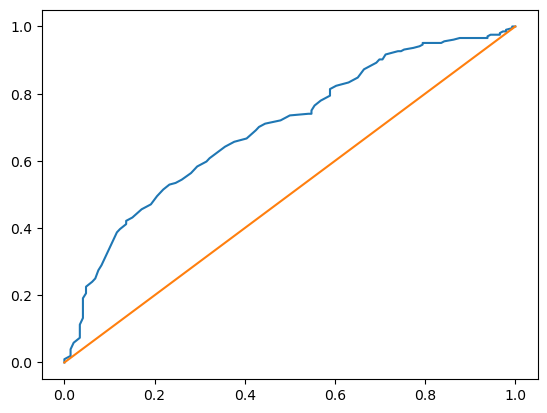

In [64]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
auc(fpr, tpr)

In [6]:
import seaborn as sns

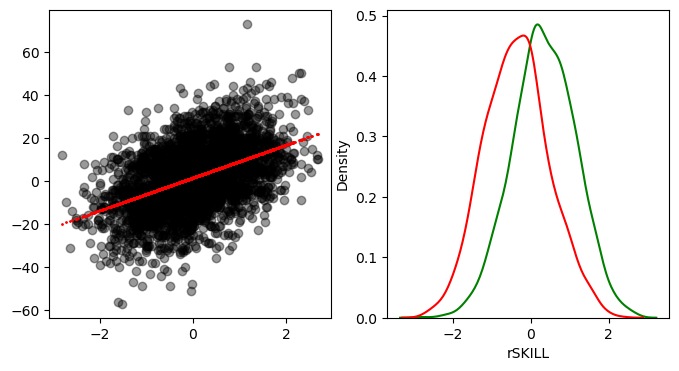

In [11]:
def plotCorr(feature) :

    _, ax = plt.subplots(1, 2, figsize = (8, 4))

    x, y = df[feature], df['PTS_diff']
    ax[0].scatter(x, y, alpha = 0.4, c = 'k')
    a, b = np.polyfit(x, y, 1)
    ax[0].scatter(x, a*x + b, s = 1, c = 'r')

    homeW = df.groupby('W_home').get_group(1)
    awayW = df.groupby('W_home').get_group(0)

    sns.kdeplot(homeW[feature], ax = ax[1], c = 'green')
    sns.kdeplot(awayW[feature], ax = ax[1], c = 'red')

    plt.show()

plotCorr('rSKILL')

In [86]:
np.polyfit(df['rVORP'], df['PTS_diff'], 1)

array([12.31119178,  1.88568538])

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA()

In [18]:
pca.fit_transform(df[['NRtg', 'NRtg_5', 'NRtg_10', 'NRtg_25']])

array([[-39.3022643 ,   6.57652773,   1.78515248,  -1.02164956],
       [ 49.30438248,  -8.56688524,  -1.94508213,   1.34996159],
       [-49.14744728,   8.25912917,   2.19962299,  -1.28516191],
       ...,
       [ -8.25359917,  -4.87611974,  -0.39293029,   1.54222823],
       [-31.35180724,  -4.03045163,  -5.7773983 ,   5.10200352],
       [-11.17549127,   0.32603783,  -3.71290027,  -0.28311625]])

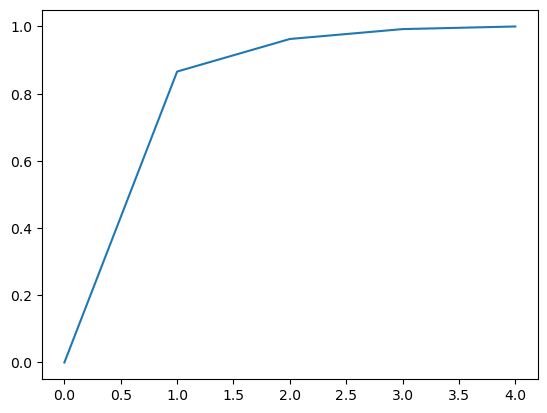

In [23]:
plt.plot([0] + list(np.cumsum(pca.explained_variance_ratio_)))

In [57]:
model = RandomForestClassifier()

In [59]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
y_pred = model.predict(X_test)

In [67]:
sum((y_test - y_pred) == 0) / y_test.shape[0]

0.6371428571428571

In [70]:
sum((y_test - np.ones_like(y_test)) == 0) / y_test.shape[0]

0.5828571428571429